In [4]:
import matplotlib.pyplot as plt
#pyplot is aliased as plt
import numpy as np
#numpy is aliased as np
import pandas as pd
#pandas is aliased as pd
import seaborn  as sns
#seaborn is aliased as sns
import warnings 
warnings.filterwarnings("ignore")

In [11]:
#importing iris dataset
df=pd.read_csv(r"C:\Users\Tusaar\Desktop\Python\pynb files\Iris.csv")

In [12]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [41]:
df.drop("Id",axis=1,inplace=True)

In [42]:
#checking shape of dataset
df.shape

(150, 5)

In [43]:
#displaying last 5 rows of the dataset
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


# Data Preprocessing

In [44]:
#Checking for the duplicated values 
df.duplicated().sum()

3

In [45]:
#dropping the duplicates
df.drop_duplicates(inplace=True)

In [46]:
#Verifying for duplicate values
df.duplicated().any()

False

In [47]:
#Checking for null values in our dataset
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Hence we checked that our dataset has no null values as well

In [48]:
#Extracting Categorical columns 
cat_col=df.select_dtypes(include="object").columns
print(cat_col)

Index(['Species'], dtype='object')


In [49]:
#Displaying the unique values of 'Species' column
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [56]:
#Displaying the counts of thwe class 
sp=df["Species"].value_counts()
sp

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64

In [51]:
#Displaying the info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  147 non-null    float64
 1   SepalWidthCm   147 non-null    float64
 2   PetalLengthCm  147 non-null    float64
 3   PetalWidthCm   147 non-null    float64
 4   Species        147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


In [52]:
#Displaying the summary of data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<function matplotlib.pyplot.show(close=None, block=None)>

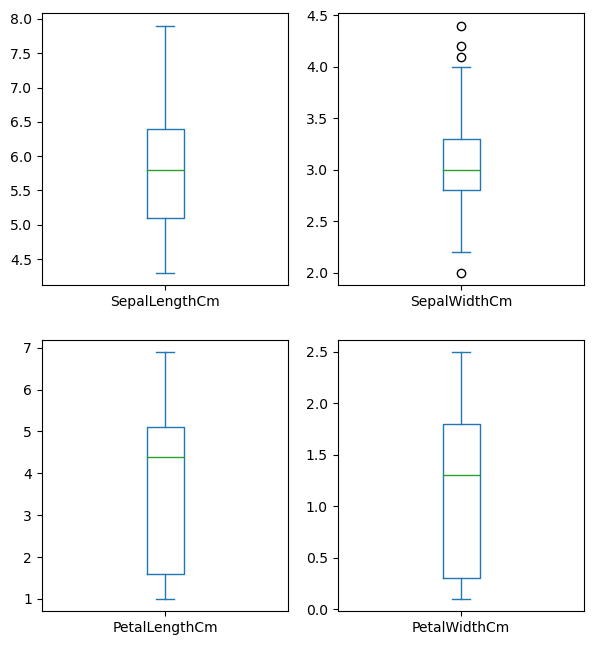

In [53]:
#boxplot for the data
df.plot(kind="box",subplots=True,layout=(3,2), figsize=(7,12))
plt.show

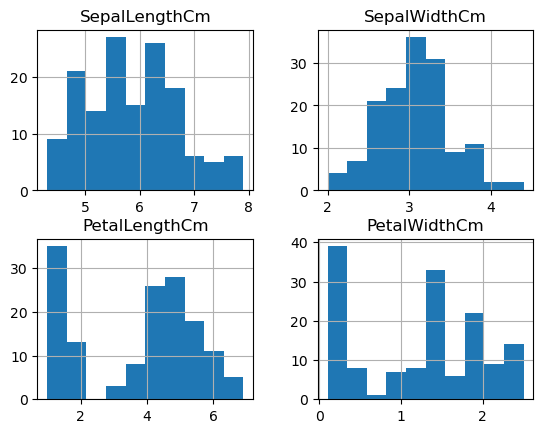

In [54]:
#Histogram plot for data
df.hist()
plt.show()

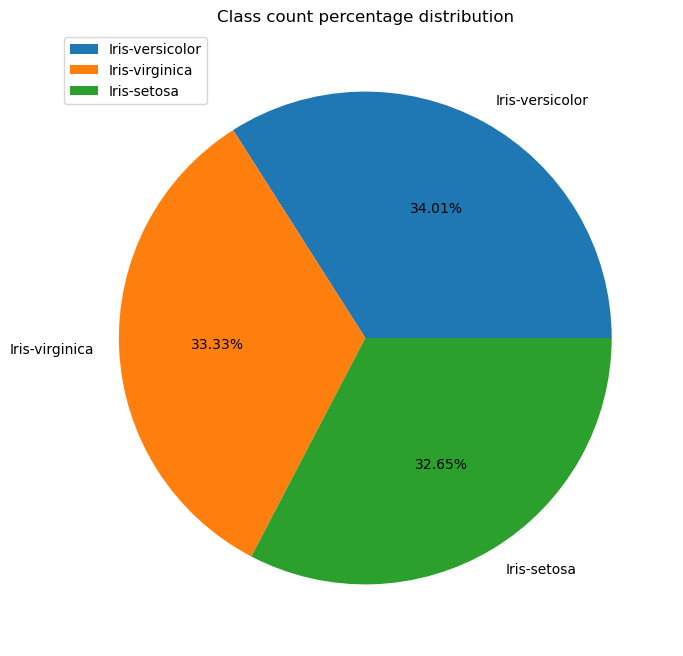

In [57]:
#plot a pie graph for species
plt.figure(figsize=(9,8))
plt.pie(sp.values,labels=sp.index,autopct='%.2f%%')
plt.title("Class count percentage distribution")
plt.legend()
plt.show()

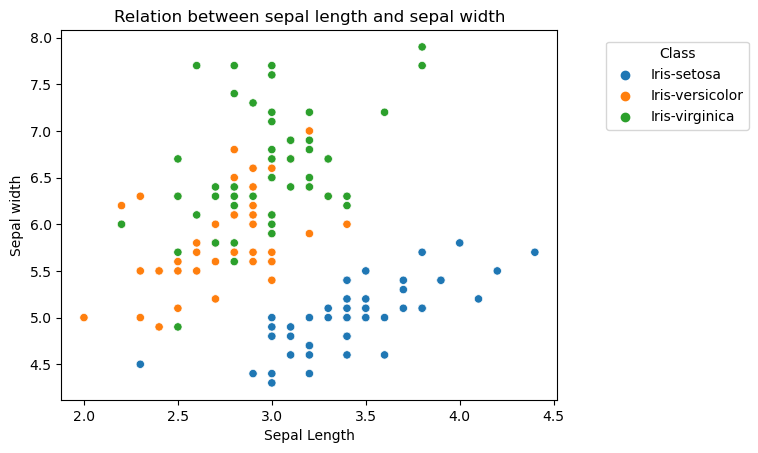

In [64]:
#plot a scatter plot for the sepal width and sepal length

sns.scatterplot(data=df,x="SepalWidthCm",y="SepalLengthCm",hue="Species")
plt.title("Relation between sepal length and sepal width")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal width")
plt.legend(title='Class',loc='right',bbox_to_anchor=(1,1,0.4,-0.3))
plt.show()


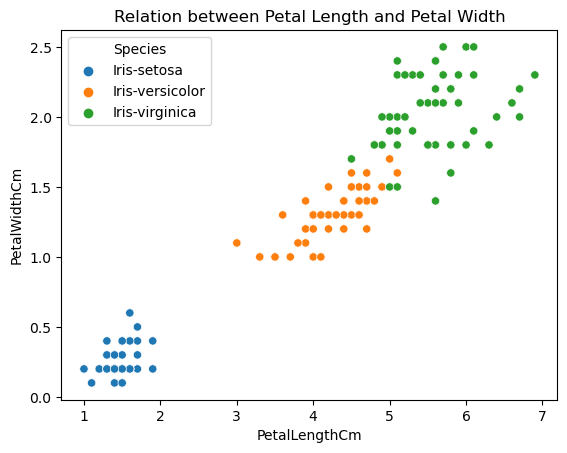

In [65]:
#plot a scatter plot for petal length and petal width 

sns.scatterplot(data=df,x="PetalLengthCm", y="PetalWidthCm",hue="Species" )
plt.title("Relation between Petal Length and Petal Width")
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
plt.show()




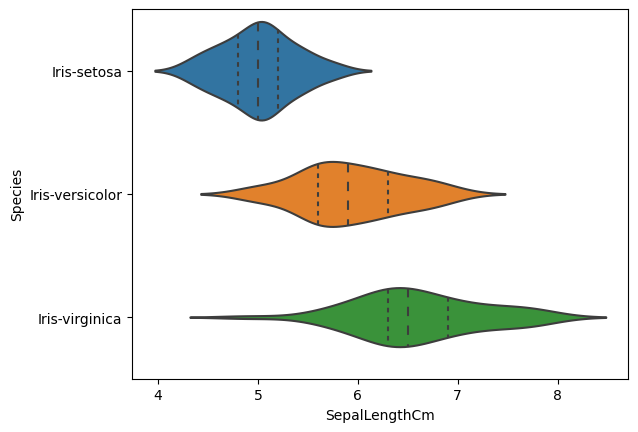

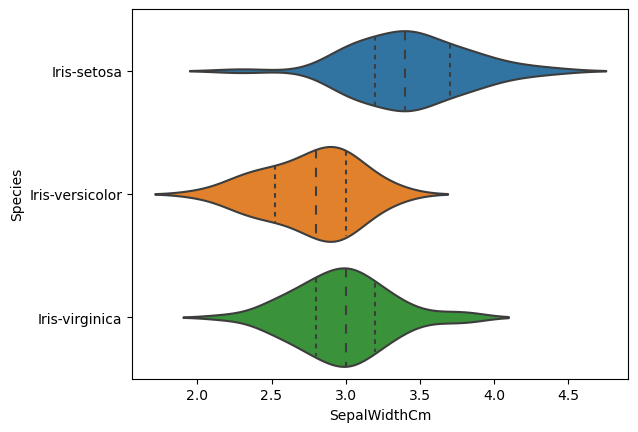

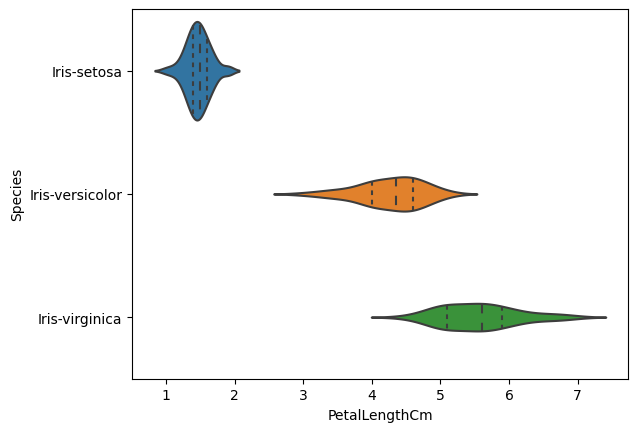

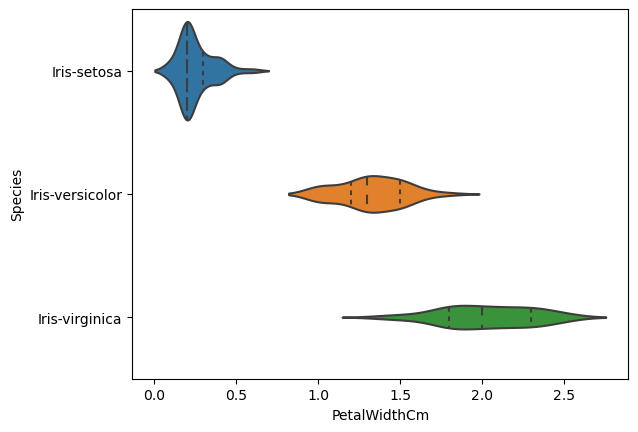

In [66]:
#plot a violin plot for species vs sepal length 

sns.violinplot(data=df, y='Species', x="SepalLengthCm", inner="quartile")
plt.show()

# plot a violin plot for class vs sepal width
sns.violinplot(data=df, y='Species', x="SepalWidthCm", inner="quartile")
plt.show()

# plot a violin plot for class vs petal length
sns.violinplot(data=df, y='Species', x="PetalLengthCm", inner="quartile")
plt.show()

# plot a violin plot for class vs petal width
sns.violinplot(data=df, y='Species', x="PetalWidthCm", inner="quartile")
plt.show()

In [67]:
#find a correlation
corr=df.corr()
corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109321,0.871305,0.817058
SepalWidthCm,-0.109321,1.000000,-0.421057,-0.356376
PetalLengthCm,0.871305,-0.421057,1.000000,0.961883
PetalWidthCm,0.817058,-0.356376,0.961883,1.000000


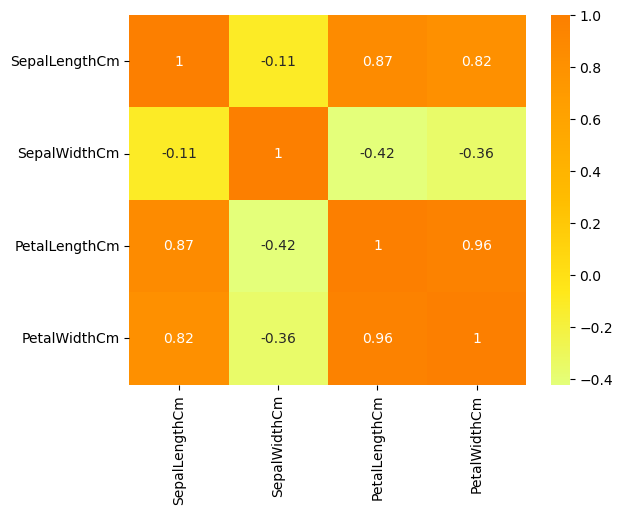

In [68]:
# plot a heatmap for correlation
sns.heatmap(corr, annot=True, cmap="Wistia")
plt.show()

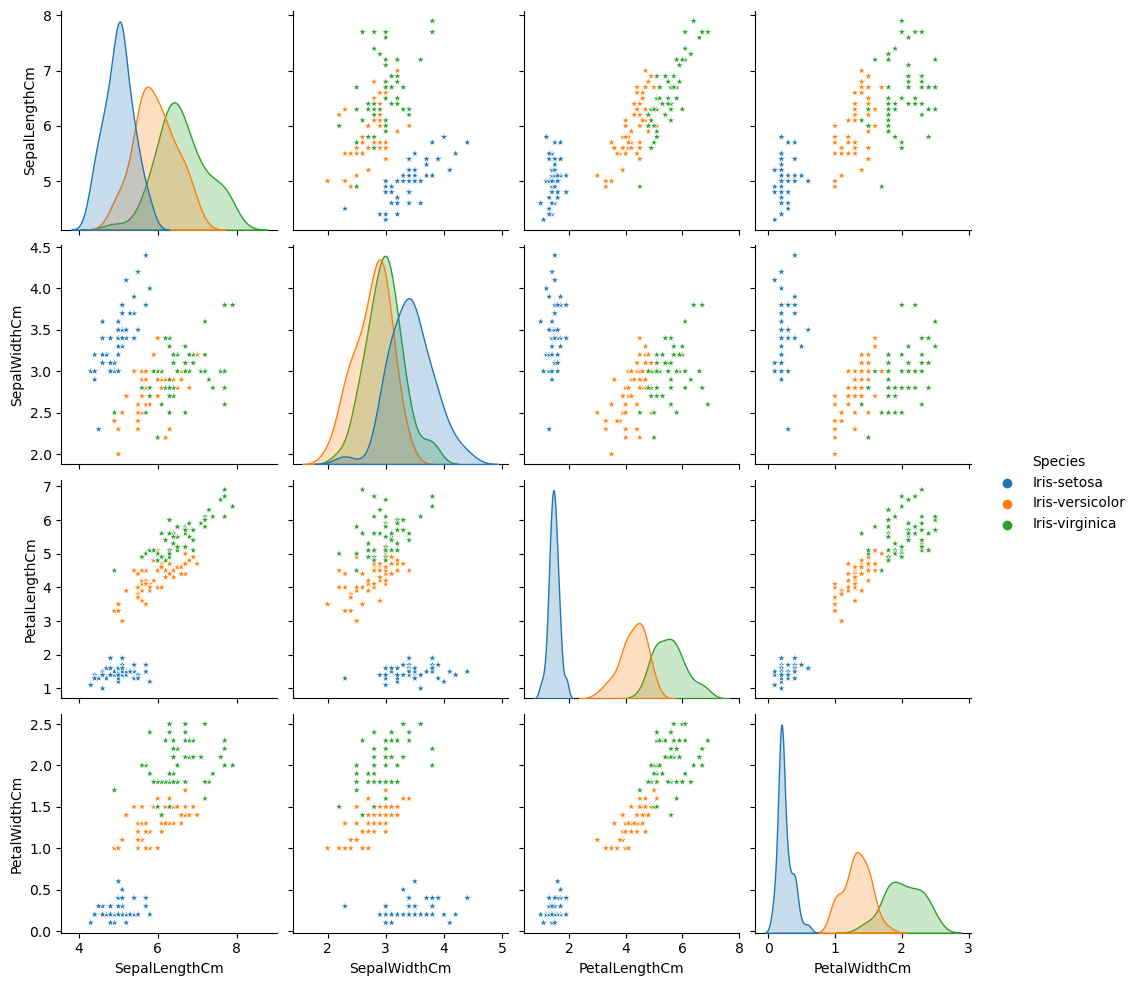

In [70]:
# plot a pairplot 
sns.pairplot(df, hue='Species', markers='*')
plt.show()

# Label Encoder

In [71]:
from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()

In [100]:
df["Species"]=la.fit_transform(df["Species"])
df.head()
df.drop("Class",axis=1,inplace=True)

# Training the model

In [101]:
# storing the data in x and y variable for training and testing the data
x=df.drop(columns=["Species"])
y=df["Species"]

In [102]:
# import train_test_split for splliting the data in training and testing form
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size=0.30)

In [103]:
# displaying the shape of the train and test data
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(102, 4)
(45, 4)
(102,)
(45,)


In [104]:
# logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [105]:
# train the model
model.fit(x_train, y_train)

LogisticRegression()

In [106]:
# predicting
Prediction=model.predict(x_test)

In [107]:
# displaying the prediction
print(Prediction)

[1 2 1 0 1 0 0 2 2 2 2 2 1 0 2 0 1 1 0 0 2 0 2 1 2 2 0 2 0 0 1 0 0 0 2 1 0
 0 2 1 2 0 1 0 1]


# Evaluation

In [108]:
# displaying the confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Prediction, y_test))

[[18  0  0]
 [ 0 11  1]
 [ 0  0 15]]


In [110]:
# to get performance
accuracy=model.score(x_test, y_test)*100
print(accuracy)

97.77777777777777


In [111]:
# displaying the classification report
from sklearn.metrics import classification_report
print(classification_report(Prediction,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.92      0.96        12
           2       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



Here this model gives 97.8% accuracy